<a href="https://colab.research.google.com/github/crisalex25/TFM/blob/main/TFM_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo de Fin de Master**
## **Máster Universitario en Inteligencia Artificial para el Sector de la Energía y las Infraestructuras**
Optimización de generación en centrales hidroeléctricas mediante técnicas de aprendizaje automático

## Procesamiento y analisis de datos


###Librerias

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

###Leer Dataset

In [2]:
AC="https://raw.githubusercontent.com/crisalex25/TFM/main/AC2.csv"
GC="https://raw.githubusercontent.com/crisalex25/TFM/main/GC2.csv"
PD="https://raw.githubusercontent.com/crisalex25/TFM/main/PrecD2.csv"


In [3]:
dfAC = pd.read_csv(AC, sep=';', decimal=",", parse_dates=['Fecha_Hora'])
dfGC = pd.read_csv(GC, sep=';', decimal=",", parse_dates=['Fecha_Hora'])
dfPD = pd.read_csv(PD, sep=';', decimal=",", parse_dates=['Fecha_Hora'])

fecha_limite = datetime(2023, 1, 1, 0, 0)  # Fecha límite

dfAC = dfAC[dfAC['Fecha_Hora'] <= fecha_limite]
dfGC = dfGC[dfGC['Fecha_Hora'] <= fecha_limite]
dfPD = dfPD[dfPD['Fecha_Hora'] <= fecha_limite]

###Graficas

In [4]:
df1=dfAC
df2=dfGC
df3=dfPD

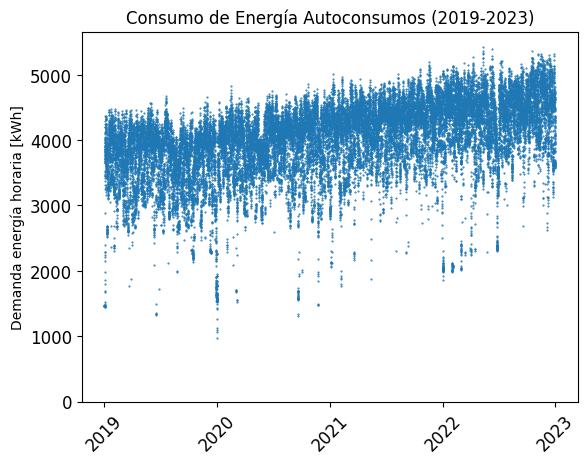

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

# Crear un DataFrame de ejemplo
df1 = pd.DataFrame(df1)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df1['Fecha_Hora'] = pd.to_datetime(df1['Fecha_Hora'],format='%d/%m/%Y %H:%M',dayfirst=True)

# Crear la gráfica de línea de tiempo
plt.plot(df1['Fecha_Hora'], df1['valor'], marker='o', linestyle='', markersize=0.5)

# Personalizar la gráfica
plt.ylim(bottom=0)
plt.ylabel('Demanda energía horaria [kWh]')
plt.title('Consumo de Energía Autoconsumos (2019-2023)')
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)

# Configurar los ejes x con años
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Mostrar la gráfica
plt.show()


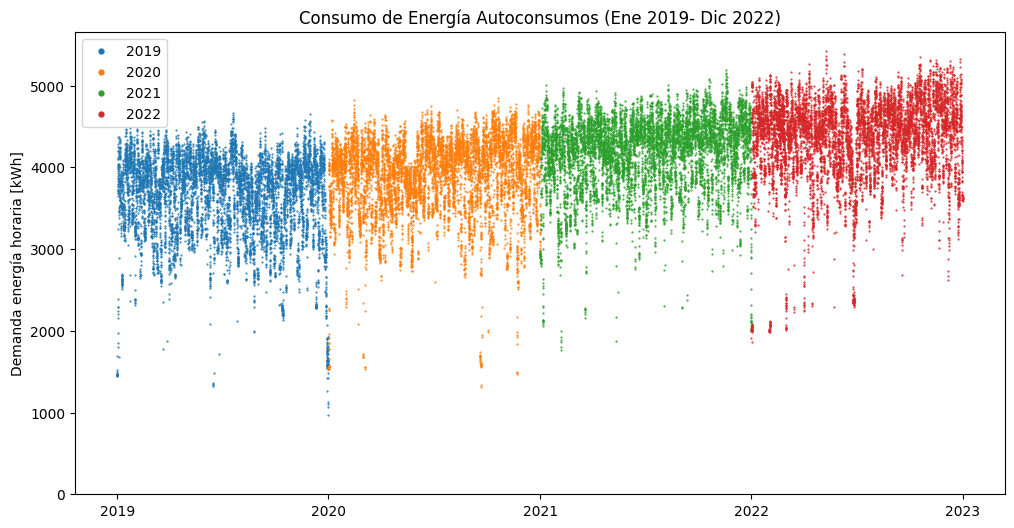

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame de ejemplo
df1 = pd.DataFrame(df1)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df1['Fecha_Hora'] = pd.to_datetime(df1['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Crear una figura y subtramas
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Iterar sobre los años
for year in range(df1['Fecha_Hora'].min().year, df1['Fecha_Hora'].max().year):
    # Filtrar los datos para el año actual
    df_year = df1[df1['Fecha_Hora'].dt.year == year]

    # Crear la gráfica de línea de tiempo para el año actual
    line, = axs.plot(df_year['Fecha_Hora'], df_year['valor'], marker='o', linestyle='', markersize=0.5, label=str(year))

# Personalizar la gráfica
axs.set_ylim(bottom=0)
axs.set_ylabel('Demanda energía horaria [kWh]')
axs.set_title('Consumo de Energía Autoconsumos (Ene 2019- Dic 2022)')

# Configurar los ejes x con años
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Añadir una leyenda con un tamaño de fuente más grande para el color
handles, labels = axs.get_legend_handles_labels()
if len(handles) > 1 and len(handles[-1].get_xdata()) < 2:
    handles = handles[:-1]
    labels = labels[:-1]
legend = axs.legend(handles, labels, markerscale=7)


# Mostrar la gráfica
plt.show()


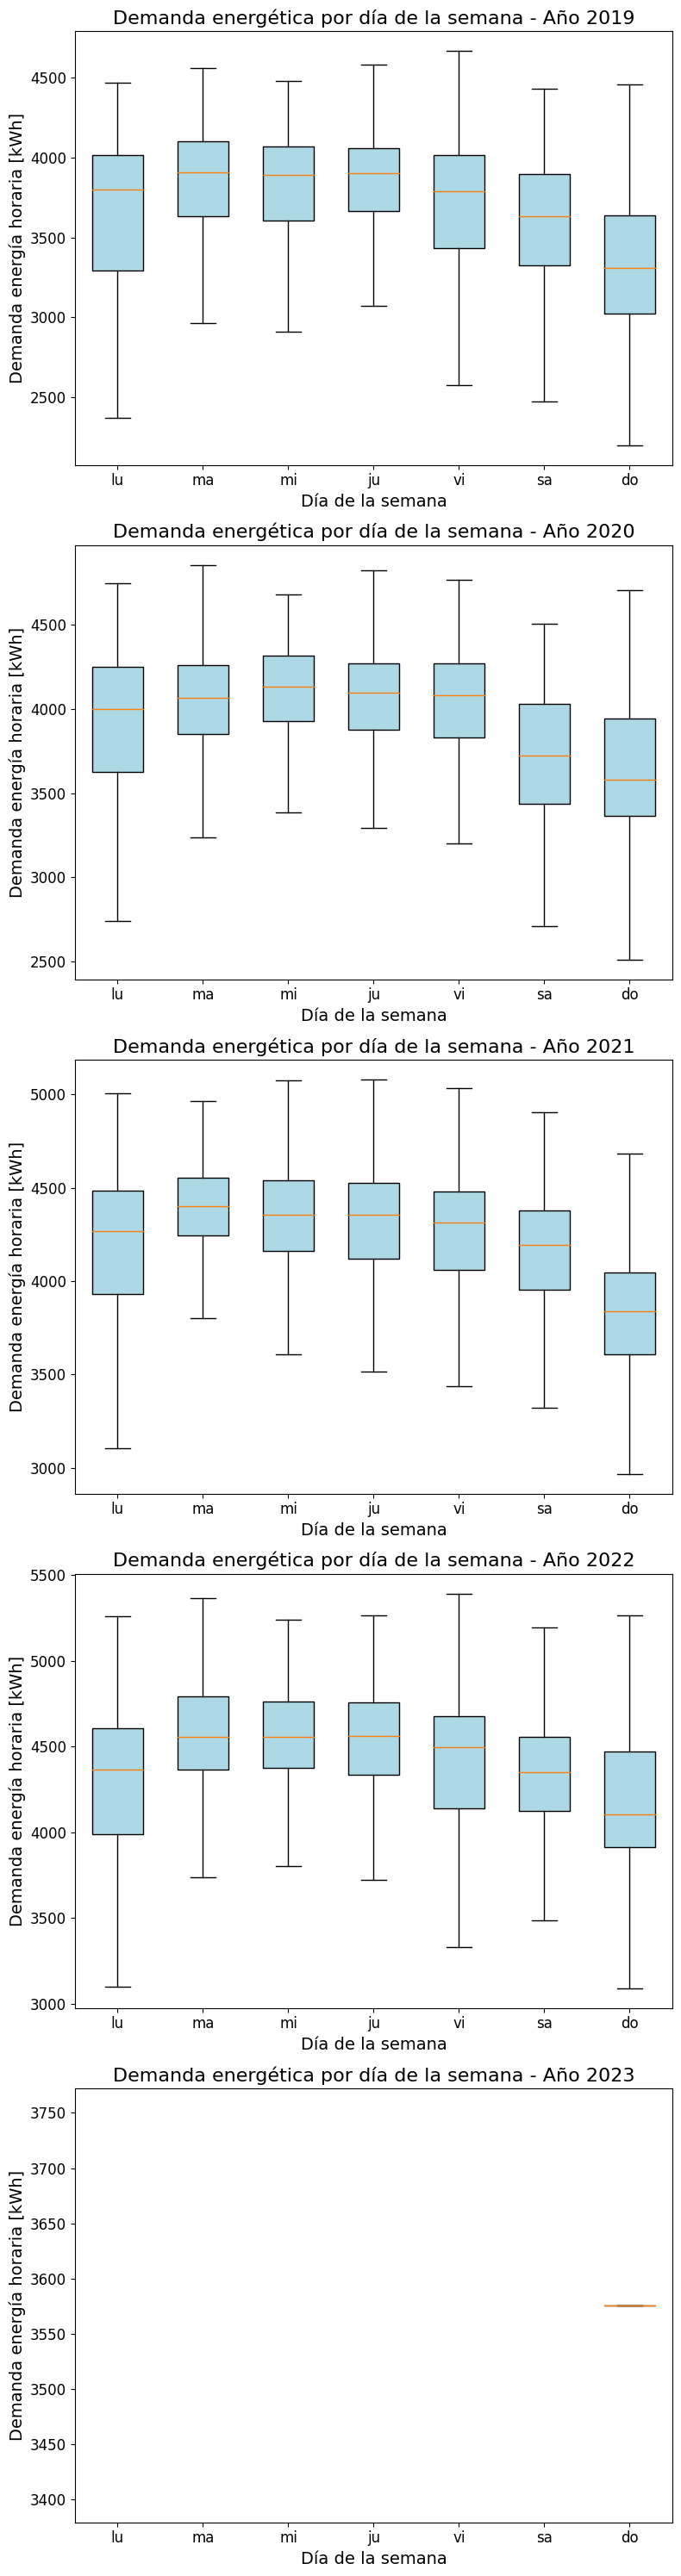

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame de ejemplo
dfAC = pd.DataFrame(dfAC)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
dfAC['Fecha_Hora'] = pd.to_datetime(dfAC['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Obtener los años presentes en el DataFrame
years = dfAC['Fecha_Hora'].dt.year.unique()

# Crear una figura y subtramas
fig, axs = plt.subplots(nrows=len(years), ncols=1, figsize=(8, 6 * len(years)))

# Iterar sobre los años
for i, year in enumerate(years):
    # Filtrar los datos para el año actual
    df_year = dfAC[dfAC['Fecha_Hora'].dt.year == year]

    # Crear una lista para almacenar los datos por día de la semana
    data_by_day = []

    # Iterar sobre los días de la semana (Lunes a Domingo)
    for day in range(7):
        # Filtrar los datos para el día de la semana actual
        df_day = df_year[df_year['Fecha_Hora'].dt.dayofweek == day]

        # Obtener la demanda energética para el día de la semana actual
        data_by_day.append(df_day['valor'].values)

    # Crear la gráfica de cajas y bigotes para el año actual
    axs[i].boxplot(data_by_day, positions=[0, 1, 2, 3, 4, 5, 6], showfliers=False, labels=['lu', 'ma', 'mi', 'ju', 'vi', 'sa', 'do'], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Personalizar la gráfica para el año actual
    axs[i].set_ylabel('Demanda energía horaria [kWh]', fontsize=14)
    axs[i].set_xlabel('Día de la semana', fontsize=14)
    axs[i].set_title(f'Demanda energética por día de la semana - Año {year}', fontsize=16)

    # Ajustar automáticamente el eje y
    axs[i].autoscale(enable=True, axis='y')

    # Aumentar el tamaño de los textos y los valores
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Ajustar el espaciado entre subtramas
fig.tight_layout()

# Mostrar las gráficas
plt.show()




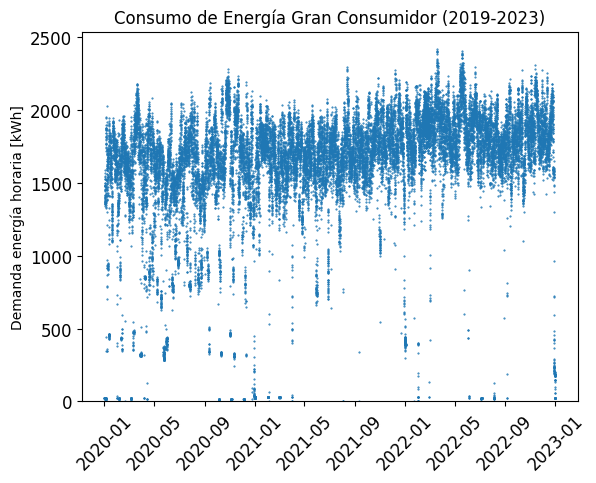

In [8]:
# Crear un DataFrame de ejemplo
df2 = pd.DataFrame(df2)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df2['Fecha_Hora'] = pd.to_datetime(df2['Fecha_Hora'],format='%d/%m/%Y %H:%M',dayfirst=True)

# Crear la gráfica de línea de tiempo
plt.plot(df2['Fecha_Hora'], df2['valor'], marker='o', linestyle='', markersize=0.5)

# Personalizar la gráfica
plt.ylim(bottom=0)
plt.ylabel('Demanda energía horaria [kWh]')
plt.title('Consumo de Energía Gran Consumidor (2019-2023)')
plt.yticks(fontsize=12)
plt.xticks(rotation=45, fontsize=12)

# Mostrar la gráfica
plt.show()

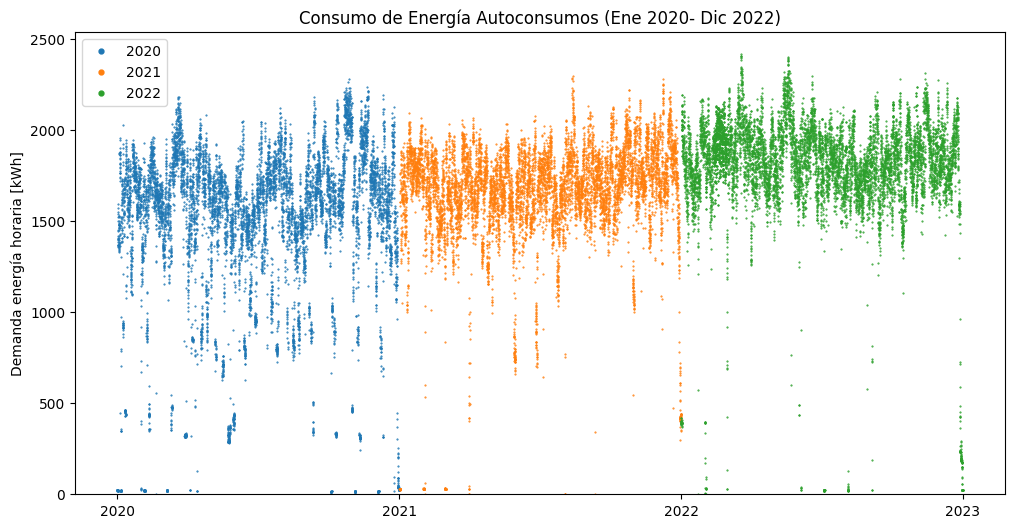

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame de ejemplo
df2 = pd.DataFrame(df2)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df2['Fecha_Hora'] = pd.to_datetime(df2['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Crear una figura y subtramas
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Iterar sobre los años
for year in range(df2['Fecha_Hora'].min().year, df2['Fecha_Hora'].max().year):
    # Filtrar los datos para el año actual
    df_year = df2[df2['Fecha_Hora'].dt.year == year]

    # Crear la gráfica de línea de tiempo para el año actual
    line, = axs.plot(df_year['Fecha_Hora'], df_year['valor'], marker='o', linestyle='', markersize=0.5, label=str(year))

# Personalizar la gráfica
axs.set_ylim(bottom=0)
axs.set_ylabel('Demanda energía horaria [kWh]')
axs.set_title('Consumo de Energía Autoconsumos (Ene 2020- Dic 2022)')

# Configurar los ejes x con años
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Añadir una leyenda con un tamaño de fuente más grande para el color
handles, labels = axs.get_legend_handles_labels()
if len(handles) > 1 and len(handles[-1].get_xdata()) < 2:
    handles = handles[:-1]
    labels = labels[:-1]
legend = axs.legend(handles, labels, markerscale=7)


# Mostrar la gráfica
plt.show()

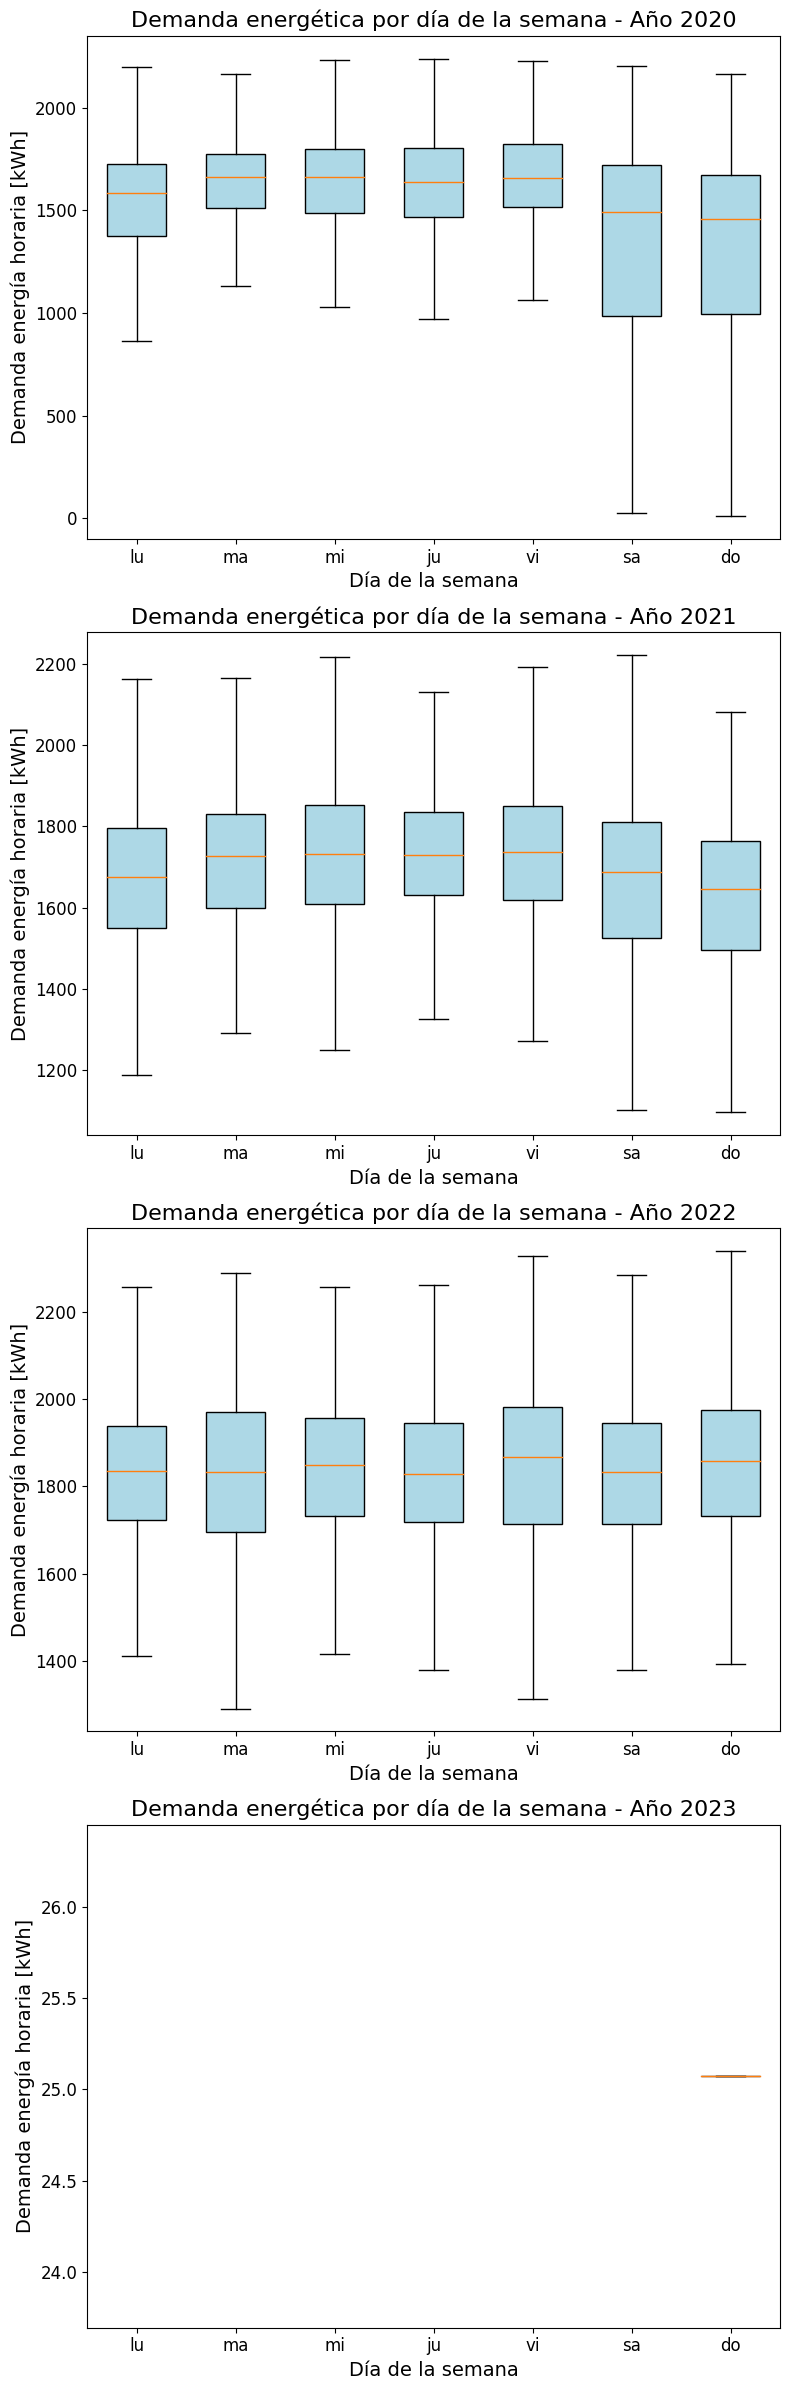

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame de ejemplo
dfGC = pd.DataFrame(dfGC)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
dfGC['Fecha_Hora'] = pd.to_datetime(dfGC['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Obtener los años presentes en el DataFrame
years = dfGC['Fecha_Hora'].dt.year.unique()

# Crear una figura y subtramas
fig, axs = plt.subplots(nrows=len(years), ncols=1, figsize=(8, 6 * len(years)))

# Iterar sobre los años
for i, year in enumerate(years):
    # Filtrar los datos para el año actual
    df_year = dfGC[dfGC['Fecha_Hora'].dt.year == year]

    # Crear una lista para almacenar los datos por día de la semana
    data_by_day = []

    # Iterar sobre los días de la semana (Lunes a Domingo)
    for day in range(7):
        # Filtrar los datos para el día de la semana actual
        df_day = df_year[df_year['Fecha_Hora'].dt.dayofweek == day]

        # Obtener la demanda energética para el día de la semana actual
        data_by_day.append(df_day['valor'].values)

    # Crear la gráfica de cajas y bigotes para el año actual
    axs[i].boxplot(data_by_day, positions=[0, 1, 2, 3, 4, 5, 6], showfliers=False, labels=['lu', 'ma', 'mi', 'ju', 'vi', 'sa', 'do'], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Personalizar la gráfica para el año actual
    axs[i].set_ylabel('Demanda energía horaria [kWh]', fontsize=14)
    axs[i].set_xlabel('Día de la semana', fontsize=14)
    axs[i].set_title(f'Demanda energética por día de la semana - Año {year}', fontsize=16)

    # Ajustar automáticamente el eje y
    axs[i].autoscale(enable=True, axis='y')

    # Aumentar el tamaño de los textos y los valores
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Ajustar el espaciado entre subtramas
fig.tight_layout()

# Mostrar las gráficas
plt.show()


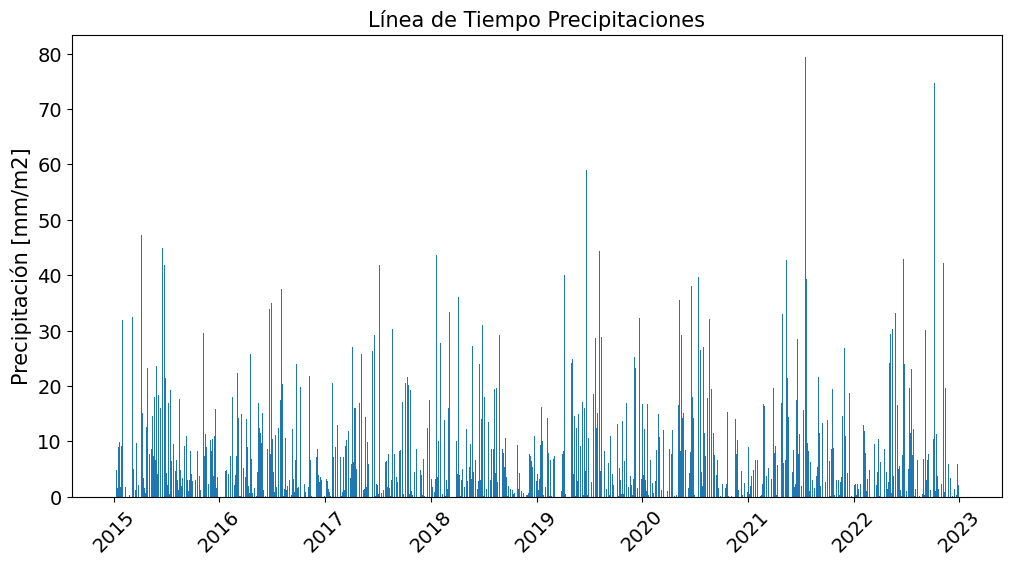

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))  # Ajustar el tamaño del gráfico
plt.bar(df['Fecha_Hora'], df['valor'])

# Personalizar la gráfica
plt.ylim(bottom=0)
plt.ylabel('Precipitación [mm/m2]', fontsize=15)  # Aumentar el tamaño del texto del eje y
plt.title('Línea de Tiempo Precipitaciones', fontsize=15)  # Aumentar el tamaño del título
plt.xticks(rotation=45, fontsize=14)  # Aumentar el tamaño de los números del eje x
plt.yticks(fontsize=14)  # Aumentar el tamaño de los números del eje y

# Mostrar la gráfica
plt.show()



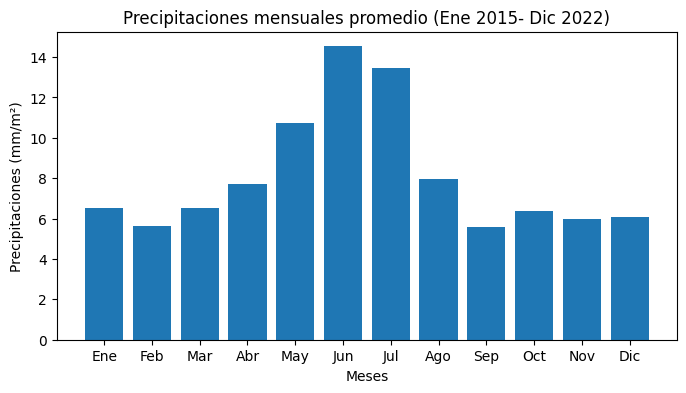

In [12]:
df3 = pd.DataFrame(df3)

# Convertir la columna 'Tiempo' a formato de fecha
df3['Fecha_Hora'] = pd.to_datetime(df3['Fecha_Hora'], format='%d/%m/%Y %H:%M',dayfirst=True)

# Agregar una columna de Meses
df3['Meses'] = df3['Fecha_Hora'].dt.month

# Calcular las precipitaciones mensuales
precipitaciones_mensuales = df3.groupby('Meses')['valor'].mean()

# Crear la gráfica de barras
plt.figure(figsize=(8, 4))  # Ajustar el tamaño del gráfico
plt.bar(precipitaciones_mensuales.index, precipitaciones_mensuales)


# Personalizar la gráfica
plt.xlabel('Meses')
plt.ylabel('Precipitaciones (mm/m²)')
plt.title('Precipitaciones mensuales promedio (Ene 2015- Dic 2022)')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la gráfica
plt.show()

In [13]:
import pandas as pd

# Crear un DataFrame de ejemplo
df3 = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df3['Fecha_Hora'] = pd.to_datetime(df3['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Agregar una columna de Meses
df3['Meses'] = df3['Fecha_Hora'].dt.month

# Calcular las precipitaciones mensuales
tabla_resumen = df3.pivot_table(index='Meses', values='valor', aggfunc='mean')

# Redondear los valores a 2 decimales
tabla_resumen = tabla_resumen.round(2)

# Establecer el nombre de los meses
tabla_resumen['Meses'] = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Ordenar la tabla por Meses
orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
tabla_resumen = tabla_resumen.set_index('Meses').loc[orden_meses]

print(tabla_resumen)
tabla_resumen = tabla_resumen.round(2)

# Exportar la tabla de resumen a un archivo CSV
tabla_resumen.to_csv('Promedio de Precipitación Mensual por Mes.csv', sep=';', decimal='.', index_label='Mes')


       valor
Meses       
Ene     6.51
Feb     5.64
Mar     6.54
Abr     7.69
May    10.73
Jun    14.53
Jul    13.44
Ago     7.95
Sep     5.56
Oct     6.38
Nov     5.99
Dic     6.07


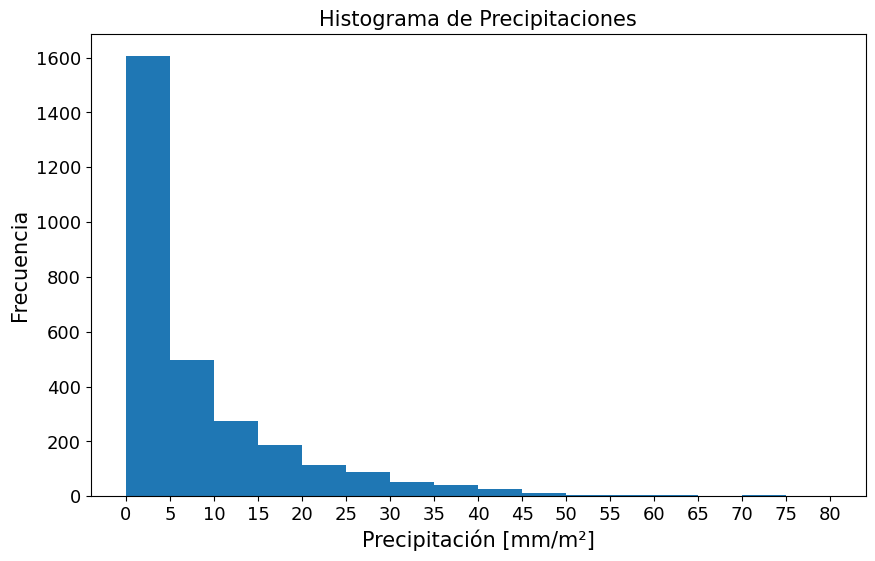

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Obtener los valores de las precipitaciones
precipitaciones = df['valor']

# Crear el histograma
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
plt.hist(precipitaciones, bins=range(0, 85, 5))  # Utilizar contenedores (bins) en intervalos de 5 desde 0 hasta 80

# Personalizar la gráfica
plt.xlabel('Precipitación [mm/m²]', fontsize=15)  # Aumentar el tamaño del texto del eje x
plt.ylabel('Frecuencia', fontsize=15)  # Aumentar el tamaño del texto del eje y
plt.title('Histograma de Precipitaciones', fontsize=15)  # Aumentar el tamaño del título
plt.xticks(range(0, 85, 5), fontsize=13)  # Establecer los ticks del eje x en intervalos de 5 desde 0 hasta 80
plt.yticks(fontsize=13)  # Aumentar el tamaño de los números del eje y

# Mostrar la gráfica
plt.show()

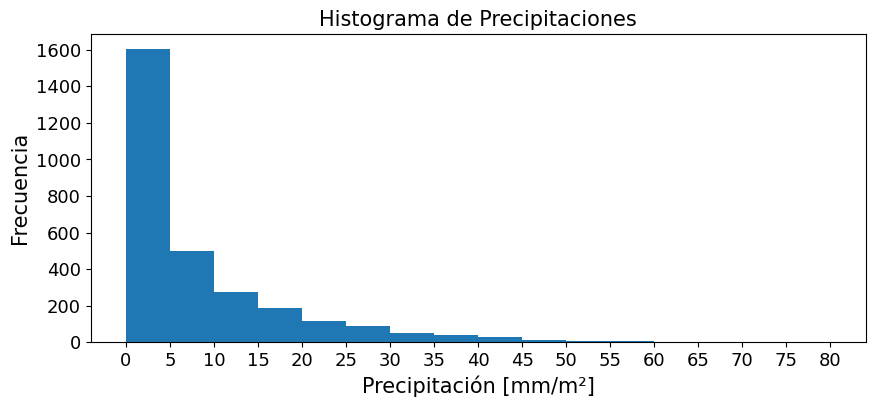

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Obtener los valores de las precipitaciones
precipitaciones = df['valor']

# Crear el histograma
plt.figure(figsize=(10, 4))  # Ajustar el tamaño del gráfico
hist, bins, _ = plt.hist(precipitaciones, bins=range(0, 85, 5))  # Utilizar contenedores (bins) en intervalos de 5 desde 0 hasta 80

# Personalizar la gráfica
plt.xlabel('Precipitación [mm/m²]', fontsize=15)  # Aumentar el tamaño del texto del eje x
plt.ylabel('Frecuencia', fontsize=15)  # Aumentar el tamaño del texto del eje y
plt.title('Histograma de Precipitaciones', fontsize=15)  # Aumentar el tamaño del título
plt.xticks(range(0, 85, 5), fontsize=13)  # Establecer los ticks del eje x en intervalos de 5 desde 0 hasta 80
plt.yticks(fontsize=13)  # Aumentar el tamaño de los números del eje y

# Mostrar la gráfica
plt.show()

# Crear un DataFrame con los datos más importantes del histograma
tabla_resumen = pd.DataFrame({'Intervalo': bins[:-1], 'Frecuencia': hist})

# Redondear los valores a 2 decimales
tabla_resumen['Intervalo'] = tabla_resumen['Intervalo'].astype(int)  # Convertir los valores del intervalo a enteros
tabla_resumen['Frecuencia'] = tabla_resumen['Frecuencia'].astype(int)  # Convertir los valores de frecuencia a enteros

# Exportar la tabla a un archivo CSV
tabla_resumen.to_csv('tabla_histograma_precipitaciones.csv', index=False, float_format='%.2f')


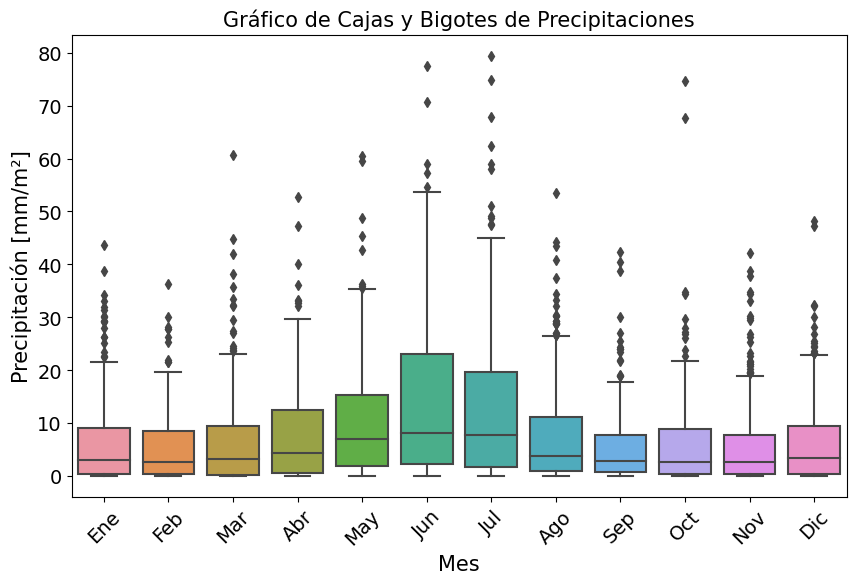

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Extraer el mes de la columna 'Fecha_Hora'
df['Mes'] = df['Fecha_Hora'].dt.month

# Mapear los números de mes a los nombres de mes
df['Mes'] = df['Mes'].map({1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'})

# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.boxplot(x='Mes', y='valor', data=df)

# Personalizar la gráfica
plt.xlabel('Mes', fontsize=15)  # Aumentar el tamaño del texto del eje x
plt.ylabel('Precipitación [mm/m²]', fontsize=15)  # Aumentar el tamaño del texto del eje y
plt.title('Gráfico de Cajas y Bigotes de Precipitaciones', fontsize=15)  # Aumentar el tamaño del título
plt.xticks(rotation=45, fontsize=14)  # Rotar y aumentar el tamaño de los nombres de los meses en el eje x
plt.yticks(fontsize=14)  # Aumentar el tamaño de los números del eje y

# Mostrar la gráfica
plt.show()


In [17]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame(df3)

# Convertir la columna 'Fecha_Hora' a formato de fecha y hora
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Extraer el mes de la columna 'Fecha_Hora'
df['Mes'] = df['Fecha_Hora'].dt.month

# Mapear los números de mes a los nombres de mes
df['Mes'] = df['Mes'].map({1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'})

# Calcular estadísticas resumidas por mes
resumen = df.groupby('Mes')['valor'].agg(['mean', 'median', 'std', 'min', 'max'])

# Redondear los valores a 2 decimales
resumen = resumen.round(2)

# Ordenar la tabla de resumen por mes
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
resumen = resumen.reindex(orden_meses)

# Mostrar la tabla de resumen ordenada por mes
print(resumen)

             mean  median    std  min   max
Mes                                        
Enero        6.51    3.00   8.56  0.0  43.7
Febrero      5.64    2.70   6.94  0.0  36.2
Marzo        6.54    3.25   8.96  0.0  60.7
Abril        7.69    4.30   9.28  0.0  52.7
Mayo        10.73    6.95  11.32  0.0  60.4
Junio       14.53    8.05  15.61  0.0  77.5
Julio       13.44    7.65  15.43  0.0  79.4
Agosto       7.95    3.80  10.09  0.0  53.4
Septiembre   5.56    2.80   7.22  0.0  42.3
Octubre      6.38    2.70   9.55  0.0  74.6
Noviembre    5.99    2.60   8.35  0.0  42.2
Diciembre    6.07    3.35   8.01  0.0  48.2


In [18]:
resumen = resumen.round(2)

# Exportar la tabla de resumen a un archivo CSV
resumen.to_csv('tabla_resumen.csv', sep=';', decimal='.', index_label='Mes')

##Modelos de predicción

####Red neuronal LSTM (memoria a corto plazo)

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

def train_lstm_model(df, sequence_length=24, epochs=20, batch_size=16, validation_split=0.2, patience=3):
    # Extraer la columna de demanda de energía
    demand_data = df['valor'].values

    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    demand_data_normalized = scaler.fit_transform(demand_data.reshape(-1, 1))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_size = int(len(demand_data_normalized) * (1 - validation_split))
    train_data, test_data = demand_data_normalized[:train_size], demand_data_normalized[train_size:]

    # Crear secuencias de entrada y salida para el entrenamiento de la red neuronal
    def create_sequences(data, seq_length):
        X = []
        y = []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    # Crear el modelo de red neuronal
    model = Sequential()
    model.add(LSTM(32, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
    model.add(LSTM(16, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(), loss='MSE', metrics=["mae","mse"])
    model.summary()

    # Entrenar el modelo
    early_stopping = EarlyStopping(patience=patience)  # Detener el entrenamiento si no hay mejora en el número de épocas especificado
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Desnormalizar los datos de predicción
    y_pred_denormalized = scaler.inverse_transform(y_pred)
    y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))

    return y_pred_denormalized, y_test_denormalized, train_size


####Red neuronal

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def train_dense_model(df, sequence_length=24, epochs=20, batch_size=16, validation_split=0.2, patience=3):
    # Extraer la columna de demanda de energía
    demand_data = df['valor'].values

    # Normalizar los datos
    scaler = MinMaxScaler(feature_range=(0, 1))
    demand_data_normalized = scaler.fit_transform(demand_data.reshape(-1, 1))

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_size = int(len(demand_data_normalized) * (1 - validation_split))
    train_data, test_data = demand_data_normalized[:train_size], demand_data_normalized[train_size:]

    # Crear secuencias de entrada y salida para el entrenamiento de la red neuronal
    def create_sequences(data, seq_length):
        X = []
        y = []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)

    # Crear el modelo de red neuronal
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(sequence_length,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=["mae","mse"])
    model.summary()

    # Entrenar el modelo
    early_stopping = EarlyStopping(patience=patience)  # Detener el entrenamiento si no hay mejora en el número de épocas especificado
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Desnormalizar los datos de predicción y los valores reales
    y_pred_denormalized = scaler.inverse_transform(y_pred)
    y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))

    return y_pred_denormalized, y_test_denormalized, train_size


###Autoconsumos

####LSTM AutoConsumo

In [23]:
y_pred_denormalized, y_test_denormalized, train_size = train_lstm_model(dfAC)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 24, 32)            4352      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1786/1786 [==============================] - 47s 25ms/step - loss: 0.0093 - mae: 0.0472 - mse: 0.0093 - val_loss: 0.0017 - val_mae: 0.0284 - val_mse: 0.0017
Epoch 2/20
1786/1786 [==============================] - 43s 24ms/step - loss: 0.0012 - mae: 0.0236 - mse: 0.0012 - val_loss: 0.0010 - val_mae: 0.020

In [24]:
dfAC.head()

,Fecha_Hora,valor
0,2019-01-01 01:00:00,1469.118
1,2019-01-01 02:00:00,1463.080
2,2019-01-01 03:00:00,1472.200
3,2019-01-01 04:00:00,1457.208
4,2019-01-01 05:00:00,1462.482


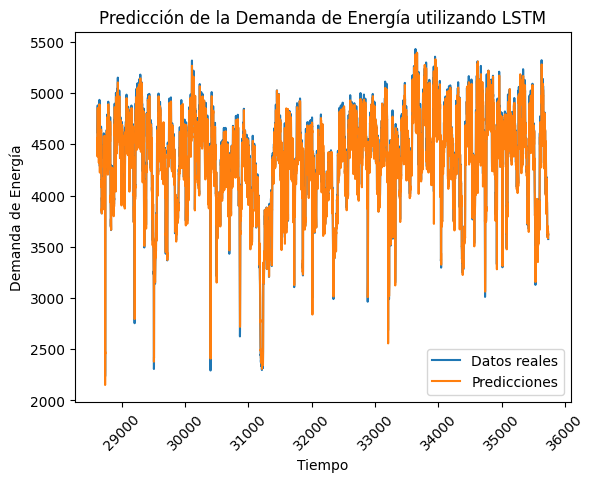

In [25]:
# Establecer la columna 'Fecha_Hora' como el índice del DataFrame
#dfAC.set_index('Fecha_Hora', inplace=True)

# Obtener las fechas correspondientes al conjunto de prueba
sequence_length=24
fechas_test = dfAC.index[train_size + sequence_length:]

# Visualizar los resultados
plt.plot(fechas_test, y_test_denormalized, label='Datos reales')
plt.plot(fechas_test, y_pred_denormalized, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando LSTM')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (MSE)
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print('Error absoluto medio (MAE):', mae)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)


Error absoluto medio (MAE): 84.89715650880824
Error cuadrático medio (MSE): 18021.214167465823
Coeficiente de determinación (R^2): 0.9112376965608886


####Red Neuronal Autoconsumo

In [27]:
y_pred_denormalized, y_test_denormalized, train_size = train_dense_model(dfAC)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               3200      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1786/1786 [==============================] - 6s 3ms/step - loss: 0.0025 - mae: 0.0280 - mse: 0.0025 - val_loss: 0.0015 - val_mae: 0.0300 - val_mse: 0.0015
Epoch 2/20
1786/

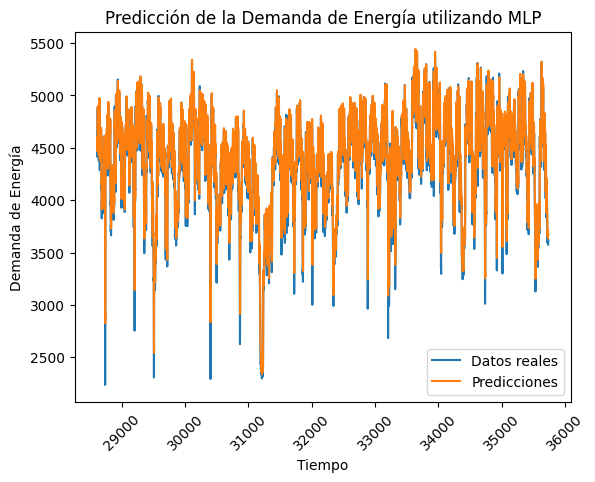

In [28]:
# Establecer la columna 'Fecha_Hora' como el índice del DataFrame
#dfAC.set_index('Fecha_Hora', inplace=True)

# Obtener las fechas correspondientes al conjunto de prueba
sequence_length=24
fechas_test = dfAC.index[train_size + sequence_length:]

# Visualizar los resultados
plt.plot(fechas_test, y_test_denormalized, label='Datos reales')
plt.plot(fechas_test, y_pred_denormalized, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando MLP')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (MSE)
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print('Error absoluto medio (MAE):', mae)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)

Error absoluto medio (MAE): 90.39695254021397
Error cuadrático medio (MSE): 18407.04459177867
Coeficiente de determinación (R^2): 0.9093373142181314


###Gran Consumidor

####Red neuronal LSTM 1 Granconsumidor


In [30]:
y_pred_denormalized, y_test_denormalized, train_size = train_lstm_model(dfGC)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 32)            4352      
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1348/1348 [==============================] - 36s 25ms/step - loss: 0.0101 - mae: 0.0472 - mse: 0.0101 - val_loss: 0.0012 - val_mae: 0.0247 - val_mse: 0.0012
Epoch 2/20
1348/1348 [==============================] - 32s 24ms/step - loss: 0.0016 - mae: 0.0264 - mse: 0.0016 - val_loss: 9.5108e-04 - val_mae: 0

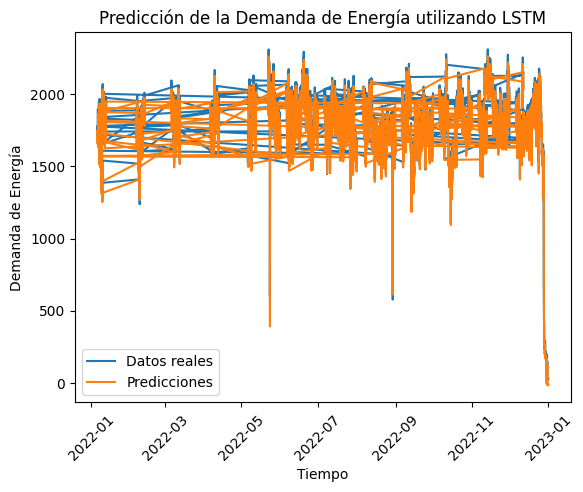

In [31]:
dfGC.set_index('Fecha_Hora', inplace=True)

# Obtener las fechas correspondientes al conjunto de prueba
sequence_length=24
fechas_test = dfGC.index[train_size + sequence_length:]

# Visualizar los resultados
plt.plot(fechas_test, y_test_denormalized, label='Datos reales')
plt.plot(fechas_test, y_pred_denormalized, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando LSTM')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (MSE)
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print('Error absoluto medio (MAE):', mae)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)



Error absoluto medio (MAE): 57.54791170964247
Error cuadrático medio (MSE): 6186.107969114884
Coeficiente de determinación (R^2): 0.9135697944047454


####Red Neuronal 1 GranConsumidor

In [33]:
y_pred_denormalized, y_test_denormalized, train_size = train_dense_model(dfGC)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               3200      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1348/1348 [==============================] - 5s 3ms/step - loss: 0.0036 - mae: 0.0327 - mse: 0.0036 - val_loss: 0.0010 - val_mae: 0.0231 - val_mse: 0.0010
Epoch 2/20
1348/

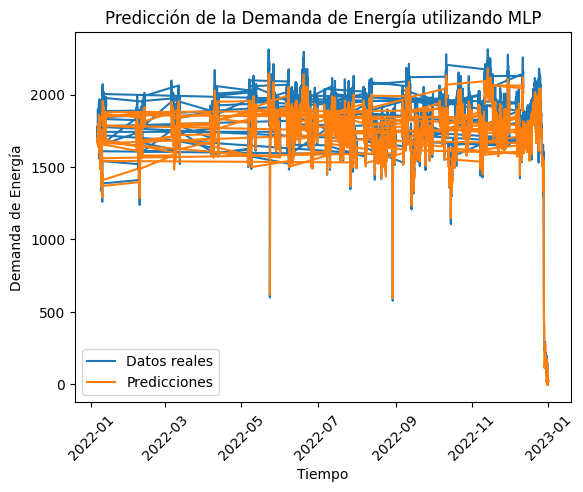

In [34]:
#dfGC.set_index('Fecha_Hora', inplace=True)

# Obtener las fechas correspondientes al conjunto de prueba
sequence_length=24
fechas_test = dfGC.index[train_size + sequence_length:]

# Visualizar los resultados
plt.plot(fechas_test, y_test_denormalized, label='Datos reales')
plt.plot(fechas_test, y_pred_denormalized, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Demanda de Energía')
plt.title('Predicción de la Demanda de Energía utilizando MLP')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular el error absoluto medio (MAE) y el error cuadrático medio (MSE)
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)
mse = mean_squared_error(y_test_denormalized, y_pred_denormalized)
r2 = r2_score(y_test_denormalized, y_pred_denormalized)

print('Error absoluto medio (MAE):', mae)
print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)

Error absoluto medio (MAE): 76.92592205189855
Error cuadrático medio (MSE): 9309.369033221397
Coeficiente de determinación (R^2): 0.8699326485214021


####Precipitacion

19/19 [==============================] - 0s 2ms/step


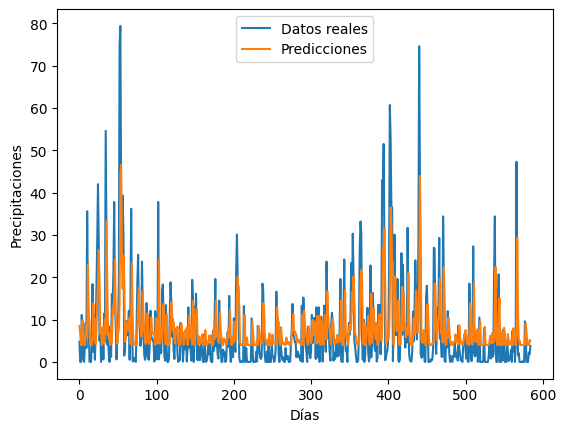

Error cuadrático medio (MSE): 83.83523292529539
Error absoluto medio (MAE): 6.297019128228865
Coeficiente de determinación (R2): 0.27317787977482677


In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Leer los datos del DataFrame
df = dfPD

# Obtener los valores de las precipitaciones diarias
precipitaciones = df.iloc[:, 1].values

# Normalizar los datos (opcional, pero generalmente recomendado para redes neuronales)
#precipitaciones = (precipitaciones - np.mean(precipitaciones)) / np.std(precipitaciones)

# Crear las listas para almacenar los datos de entrada (X) y salida (y)
X = []
y = []

# Crear los datos de entrenamiento y prueba
for i in range(len(precipitaciones) - 1):
    X.append(precipitaciones[i])
    y.append(precipitaciones[i + 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convertir los datos a arrays de numpy
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='linear', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='linear'),
    #tf.keras.layers.Dense(1, activation='linear'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='Adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Desnormalizar las predicciones y los datos reales
#y_pred = (y_pred * np.std(precipitaciones)) + np.mean(precipitaciones)
#y_test = (y_test * np.std(precipitaciones)) + np.mean(precipitaciones)


# Graficar las predicciones vs los datos reales del test
plt.plot(y_test, label='Datos reales')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Días')
plt.ylabel('Precipitaciones')
plt.legend()
plt.show()

# Imprimir las métricas
print('Error cuadrático medio (MSE):', mse)
print('Error absoluto medio (MAE):', mae)
print('Coeficiente de determinación (R2):', r2)


19/19 [==============================] - 0s 3ms/step


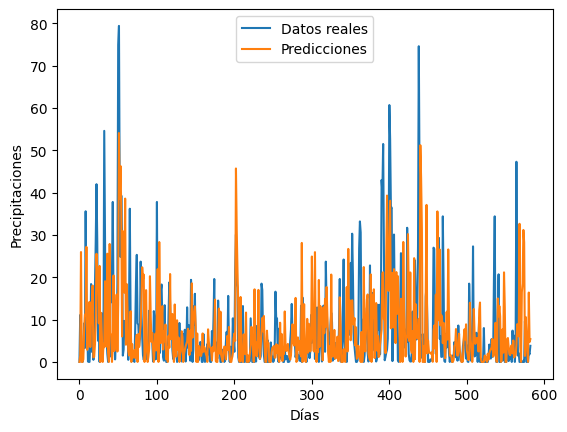

Error cuadrático medio (MSE): 137.85746403867788
Error absoluto medio (MAE): 7.622314246083205
Coeficiente de determinación (R2): -0.19216360228812968


In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Leer los datos del DataFrame
df = dfPD  # Reemplaza 'datos.csv' con el nombre de tu archivo

# Obtener los valores de las precipitaciones diarias
precipitaciones = df.iloc[:, 1].values

# Normalizar los datos (opcional, pero generalmente recomendado para redes neuronales)
#precipitaciones = (precipitaciones - np.mean(precipitaciones)) / np.std(precipitaciones)

# Crear las listas para almacenar los datos de entrada (X) y salida (y)
X = []
y = []

# Crear los datos de entrada y salida
sequence_length = 10  # Longitud de la secuencia de entrada para LSTM

for i in range(len(precipitaciones) - sequence_length):
    X.append(precipitaciones[i:i+sequence_length])
    y.append(precipitaciones[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Crear el modelo de red neuronal LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Realizar predicciones
y_pred = model.predict(X_test)

# Asegurar que los valores de las predicciones no sean menores que cero
y_pred = np.maximum(y_pred, 0)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Desnormalizar las predicciones y los datos reales
#y_pred = (y_pred * np.std(precipitaciones)) + np.mean(precipitaciones)
#y_test = (y_test * np.std(precipitaciones)) + np.mean(precipitaciones)


# Graficar las predicciones vs los datos reales del test
plt.plot(y_test, label='Datos reales')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Días')
plt.ylabel('Precipitaciones')
plt.legend()
plt.show()

# Imprimir las métricas
print('Error cuadrático medio (MSE):', mse)
print('Error absoluto medio (MAE):', mae)
print('Coeficiente de determinación (R2):', r2)


##Optimización


In [38]:
import random
from tabulate import tabulate

def calcular_costo_deficit(generacion, demanda, costo_horario):
    deficit = generacion - demanda
    if deficit < 0:
        costo_deficit = abs(deficit) * costo_horario
    else:
        costo_deficit = 0
    return costo_deficit

def generar_solucion_inicial(capacidad_unit1, capacidad_unit2, rango_horario):
    generacion_inicial = {}
    for hora in rango_horario:
        generacion_unit1 = random.uniform(400, capacidad_unit1)
        generacion_unit2 = random.uniform(1600, capacidad_unit2)
        generacion_inicial[hora] = (generacion_unit1, generacion_unit2)
    return generacion_inicial

def generar_movimiento(generacion_unit):
    incremento = random.uniform(-0.1, 0.1) * generacion_unit
    nueva_generacion_unit = generacion_unit + incremento
    return max(nueva_generacion_unit, 0)  # Asegurarse de no tener generación negativa

def aplicar_heuristica(capacidad_unit1, capacidad_unit2, demanda_energia, costo_horario, rango_horario, iteraciones):
    mejor_costo_deficit = float('inf')
    mejor_generacion = {}

    for _ in range(iteraciones):
        generacion = generar_solucion_inicial(capacidad_unit1, capacidad_unit2, rango_horario)
        costo_deficit = sum(calcular_costo_deficit(generacion[hora][0] + generacion[hora][1], demanda_energia[hora], costo_horario) for hora in rango_horario)

        for _ in range(100):  # Número fijo de iteraciones de mejora por solución inicial
            nueva_generacion = {}
            for hora in rango_horario:
                generacion_unit1, generacion_unit2 = generacion[hora]
                nueva_generacion_unit1 = generar_movimiento(generacion_unit1)
                nueva_generacion_unit2 = generar_movimiento(generacion_unit2)
                nueva_generacion[hora] = (nueva_generacion_unit1, nueva_generacion_unit2)

            nuevo_costo_deficit = sum(calcular_costo_deficit(nueva_generacion[hora][0] + nueva_generacion[hora][1], demanda_energia[hora], costo_horario) for hora in rango_horario)

            if nuevo_costo_deficit < costo_deficit:
                generacion = nueva_generacion
                costo_deficit = nuevo_costo_deficit
            else:
                break

        if costo_deficit < mejor_costo_deficit:
            mejor_costo_deficit = costo_deficit
            mejor_generacion = generacion

    return mejor_generacion, mejor_costo_deficit

# Ejemplo de uso
capacidad_unit1 = 1800
capacidad_unit2 = 4200
costo_horario = 10
rango_horario = range(24)  # Horas del día (0 a 23)

# Generar demanda de energía aleatoria para cada hora del día
demanda_energia = {hora: random.uniform(2000, 3600) for hora in rango_horario}

iteraciones = 100

mejor_generacion, mejor_costo_deficit = aplicar_heuristica(capacidad_unit1, capacidad_unit2, demanda_energia, costo_horario, rango_horario, iteraciones)

# Preparar los datos para la tabla
tabla_resultados = []
for hora, generacion in mejor_generacion.items():
    fila = [hora, generacion[0], generacion[1], calcular_costo_deficit(generacion[0] + generacion[1], demanda_energia[hora], costo_horario), demanda_energia[hora]]
    tabla_resultados.append(fila)

# Mostrar los resultados en una tabla
headers = ["Hora", "Generación Unidad 1", "Generación Unidad 2", "Costo Déficit", "Demanda"]
tabla = tabulate(tabla_resultados, headers, tablefmt="grid")
print(tabla)



+--------+-----------------------+-----------------------+-----------------+-----------+
|   Hora |   Generación Unidad 1 |   Generación Unidad 2 |   Costo Déficit |   Demanda |
+========+=======================+=======================+=================+===========+
|      0 |              1481.45  |               3897.55 |               0 |   2768.27 |
+--------+-----------------------+-----------------------+-----------------+-----------+
|      1 |               852.279 |               2675.98 |               0 |   2034.13 |
+--------+-----------------------+-----------------------+-----------------+-----------+
|      2 |              1069.69  |               3211.83 |               0 |   3580    |
+--------+-----------------------+-----------------------+-----------------+-----------+
|      3 |              1283.1   |               2133.3  |               0 |   2622.18 |
+--------+-----------------------+-----------------------+-----------------+-----------+
|      4 |           

In [39]:
import random
from tabulate import tabulate

def calcular_costo_deficit(generacion, demanda, costo_horario):
    deficit = generacion - demanda
    if deficit < 0:
        costo_deficit = abs(deficit) * costo_horario
    else:
        costo_deficit = 0
    return costo_deficit

def generar_solucion_inicial(capacidad_unit1, capacidad_unit2, capacidad_unit3, rango_horario):
    generacion_inicial = {}
    for hora in rango_horario:
        generacion_unit1 = random.uniform(0, capacidad_unit1)
        generacion_unit2 = random.uniform(0, capacidad_unit2)
        generacion_unit3 = random.uniform(0, capacidad_unit3)
        generacion_inicial[hora] = (generacion_unit1, generacion_unit2, generacion_unit3)
    return generacion_inicial

def generar_movimiento(generacion_unit):
    incremento = random.uniform(-0.1, 0.1) * generacion_unit
    nueva_generacion_unit = generacion_unit + incremento
    return max(nueva_generacion_unit, 0)  # Asegurarse de no tener generación negativa

def aplicar_heuristica(capacidad_unit1, capacidad_unit2, capacidad_unit3, demanda_energia, costo_horario, rango_horario, iteraciones):
    mejor_costo_deficit = float('inf')
    mejor_generacion = {}

    for _ in range(iteraciones):
        generacion = generar_solucion_inicial(capacidad_unit1, capacidad_unit2, capacidad_unit3, rango_horario)
        costo_deficit = sum(calcular_costo_deficit(sum(generacion[hora]), demanda_energia[hora], costo_horario) for hora in rango_horario)

        for _ in range(100):  # Número fijo de iteraciones de mejora por solución inicial
            nueva_generacion = {}
            for hora in rango_horario:
                generacion_unit1, generacion_unit2, generacion_unit3 = generacion[hora]
                nueva_generacion_unit1 = generar_movimiento(generacion_unit1)
                nueva_generacion_unit2 = generar_movimiento(generacion_unit2)
                nueva_generacion_unit3 = generar_movimiento(generacion_unit3)
                nueva_generacion[hora] = (nueva_generacion_unit1, nueva_generacion_unit2, nueva_generacion_unit3)

            nuevo_costo_deficit = sum(calcular_costo_deficit(sum(nueva_generacion[hora]), demanda_energia[hora], costo_horario) for hora in rango_horario)

            if nuevo_costo_deficit < costo_deficit:
                generacion = nueva_generacion
                costo_deficit = nuevo_costo_deficit
            else:
                break

        if costo_deficit < mejor_costo_deficit:
            mejor_costo_deficit = costo_deficit
            mejor_generacion = generacion

    return mejor_generacion, mejor_costo_deficit

# Ejemplo de uso
capacidad_unit1 = 1800
capacidad_unit2 = 4200
capacidad_unit3 = 2100  # Capacidad del nuevo generador
costo_horario = 10
rango_horario = range(24)  # Horas del día (0 a 23)

# Generar demanda de energía aleatoria para cada hora del día
# Generar demanda de energía aleatoria para cada hora del día
demanda_energia = {hora: random.uniform(2000, 3600) for hora in rango_horario}

# Generar demanda de energía para la nueva industria
demanda_industria = {hora: random.uniform(500, 2200) for hora in rango_horario}

# Combinar las demandas de las dos industrias
demanda_total = {hora: demanda_energia[hora] + demanda_industria[hora] for hora in rango_horario}

iteraciones = 100

mejor_generacion, mejor_costo_deficit = aplicar_heuristica(capacidad_unit1, capacidad_unit2, capacidad_unit3, demanda_total, costo_horario, rango_horario, iteraciones)

# Preparar los datos para la tabla
tabla_resultados = []
for hora, generacion in mejor_generacion.items():
    generacion_total = sum(generacion)
    demanda_total_hora = demanda_total[hora]
    deficit_industria = max(generacion_total - demanda_industria[hora], 0)
    deficit_energia = max(generacion_total - demanda_energia[hora], 0)
    costo_deficit = calcular_costo_deficit(generacion_total, demanda_total_hora, costo_horario)
    fila = [hora, generacion[0], generacion[1], generacion[2], costo_deficit, deficit_industria, deficit_energia, demanda_total_hora]
    tabla_resultados.append(fila)

# Mostrar los resultados en una tabla
headers = ["Hora", "Generación Unidad 1", "Generación Unidad 2", "Generación Unidad 3", "Costo Déficit", "Déficit Industria", "Déficit Energía", "Demanda Total"]
tabla = tabulate(tabla_resultados, headers, tablefmt="grid")
print(tabla)


+--------+-----------------------+-----------------------+-----------------------+-----------------+---------------------+-------------------+-----------------+
|   Hora |   Generación Unidad 1 |   Generación Unidad 2 |   Generación Unidad 3 |   Costo Déficit |   Déficit Industria |   Déficit Energía |   Demanda Total |
+========+=======================+=======================+=======================+=================+=====================+===================+=================+
|      0 |               878.482 |              2969.1   |             1808.74   |            0    |            4179.11  |          3164.47  |         3969.08 |
+--------+-----------------------+-----------------------+-----------------------+-----------------+---------------------+-------------------+-----------------+
|      1 |               252.389 |              2757.27  |             1727.07   |            0    |            2633.89  |          2477.59  |         4361.98 |
+--------+-----------------------+

###Optimización PULP

In [40]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 79.0 MB/s eta 0:00:00


In [41]:
"""
 The Furniture problem from EngSci391 for the PuLP Modeller
 Author: Dr Stuart Mitchell    2007
"""
from pulp import *

Chairs = ["A", "B"]
costs = {"A": 100, "B": 150}
Resources = ["Lathe", "Polisher"]
capacity = {"Lathe": 40, "Polisher": 48}
activity = [  # Chairs
    # A  B
    [1, 2],  # Lathe
    [3, 1.5],  # Polisher
]
activity = makeDict([Resources, Chairs], activity)
prob = LpProblem("Furniture Manufacturing Problem", LpMaximize)
vars = LpVariable.dicts("Number of Chairs", Chairs, lowBound=0)
# objective
prob += lpSum([costs[c] * vars[c] for c in Chairs])
for r in Resources:
    prob += (
        lpSum([activity[r][c] * vars[c] for c in Chairs]) <= capacity[r],
        f"capacity_of_{r}",
    )
prob.writeLP("furniture.lp")
prob.solve()
# Each of the variables is printed with it's value
for v in prob.variables():
    print(v.name, "=", v.varValue)
# The optimised objective function value is printed to the screen
print("Total Revenue from Production = ", value(prob.objective))

Number_of_Chairs_A = 8.0
Number_of_Chairs_B = 16.0
Total Revenue from Production =  3200.0


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [42]:
import numpy as np
from scipy.optimize import linprog

# Condiciones de operación
gen_max = [1900, 4200, 2100]
gen_min = [400, 1600, 400]
caudal_x = 0.8
demand_autoconsumo = [4811, 4787, 4778, 4780, 4856, 4878, 4853, 4901, 5082, 5250, 5292, 5305, 5103, 5219, 5266, 5258, 5311, 5138, 4989, 4876, 4745, 4876, 4833, 4845]
demand_gran_consumidor = [2114, 2175, 2095, 2248, 2213, 2170, 2172, 2286, 2289, 2213, 2181, 2303, 2374, 2332, 2200, 2264, 2251, 2162, 2261, 2120, 2028, 2136, 2183, 2198]

# Precios de energía horaria
precios_energia = [6.19, 8.39, 6.19, 6.19, 5.35, 6.48, 5.35, 5.35, 6.19, 6.19, 6.19, 6.48, 6.19, 6.48, 6.19, 6.48, 6.19, 6.19, 9.46, 9.46, 8.96, 6.19, 6.19, 6.19]

# Funciones para calcular el caudal turbimado
def calcular_caudal_turbimado(p):
    qt1 = 0.0009 * p[0] + 0.2624
    qt2 = 0.0008 * p[1] + 0.053
    qt3 = 0.0005 * p[2] - 0.0154
    return [qt1, qt2, qt3]

# Matriz de restricciones para el método de programación lineal
A = np.array([
    [-1, 0, 0],
    [0, -1, 0],
    [0, 0, -1],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
b = np.array([-gen_min[0], -gen_min[1], -gen_min[2], gen_max[0], gen_max[1], gen_max[2]])

# Optimización por programación lineal
min_cost = float('inf')
opt_gen = None

for t in range(len(demand_autoconsumo)):
    demand_total = demand_autoconsumo[t] + demand_gran_consumidor[t]
    demand_unidad3 = demand_gran_consumidor[t]
    demand_unidad1_2 = demand_autoconsumo[t]

    c = np.array([precios_energia[t], precios_energia[t], precios_energia[t]])  # Costos de compra de energía

    # Restricciones adicionales para el caudal turbimado
    A_extra = np.array([
        [1, 1, -1]
    ])
    b_extra = np.array([caudal_x + demand_unidad3])

    # Combinar las restricciones y restricciones adicionales
    A_combined = np.concatenate((A, A_extra), axis=0)
    b_combined = np.concatenate((b, b_extra), axis=0)

    # Resolver el problema de programación lineal
    res = linprog(c, A_ub=A_combined, b_ub=b_combined, bounds=[(gen_min[0], gen_max[0]), (gen_min[1], gen_max[1]), (gen_min[2], gen_max[2])])

    # Calcular el costo de compra de energía de déficit
    deficit = max(0, demand_total - np.sum(res.x))
    costo_deficit = deficit * precios_energia[t]

    # Actualizar la solución óptima si se encuentra un costo menor
    if costo_deficit < min_cost:
        min_cost = costo_deficit
        opt_gen = res.x

# Imprimir resultados
print("Generación óptima de las unidades hidroeléctricas:")
print("Unidad 1: {:.2f} kW".format(opt_gen[0]))
print("Unidad 2: {:.2f} kW".format(opt_gen[1]))
print("Unidad 3: {:.2f} kW".format(opt_gen[2]))
print("Costo mínimo de compra de energía de déficit: {:.2f}".format(min_cost))



Generación óptima de las unidades hidroeléctricas:
Unidad 1: 400.00 kW
Unidad 2: 1600.00 kW
Unidad 3: 400.00 kW
Costo mínimo de compra de energía de déficit: 24743.75


In [43]:
from pulp import *

# Datos de las unidades hidroeléctricas
gen_max = [1900, 4200, 2100]  # Generación máxima de cada unidad
gen_min = [0, 1600, 400]  # Generación mínima de cada unidad

# Caudal turbina para cada unidad
def caudal_turbina(p):
    return [0.0009 * p[0] + 0.2624, 0.0008 * p[1] + 0.053, 0.0005 * p[2] - 0.0154]

# Precios de energía horaria
precios_energia = [
    6.19, 8.39, 6.19, 6.19, 5.35, 6.48, 5.35, 5.35, 6.19, 6.19, 6.19, 6.48,
    6.19, 6.48, 6.19, 6.48, 6.19, 6.19, 9.46, 9.46, 8.96, 6.19, 6.19, 6.19
]

# Demanda horaria de autoconsumo y gran consumidor
demanda_autoconsumo = [
    4811, 4787, 4778, 4780, 4856, 4878, 4853, 4901, 5082, 5250, 5292, 5305,
    5103, 5219, 5266, 5258, 5311, 5138, 4989, 4876, 4745, 4876, 4833, 4845
]
demanda_gran_consumidor = [
    2114, 2175, 2095, 2248, 2213, 2170, 2172, 2286, 2289, 2213, 2181, 2303,
    2374, 2332, 2200, 2264, 2251, 2162, 2261, 2120, 2028, 2136, 2183, 2198
]

# Crear el problema de optimización
prob = LpProblem("Optimización de generación", LpMinimize)

# Variables de decisión: generación de cada unidad en cada hora
generacion = [
    [LpVariable(f"gen_{i}_{j}", gen_min[i], gen_max[i]) for j in range(24)]
    for i in range(3)
]
# Variable de déficit para el Autoconsumo
deficit_autoconsumo = [LpVariable(f"deficit1_{j}", lowBound=0) for j in range(24)]

# Variable de déficit para el gran consumidor
deficit_gran_consumidor = [LpVariable(f"deficit2_{j}", lowBound=0) for j in range(24)]


# Función objetivo: minimizar el costo de compra de energía de déficit
prob += lpSum([
    precios_energia[j] * deficit_gran_consumidor[j] + precios_energia[j] * deficit_autoconsumo[j]
    for j in range(24)
])

# Restricciones de generación y demanda
for j in range(24):
    # Restricciones de generación mínima y máxima
    for i in range(3):
        prob += generacion[i][j] >= gen_min[i]
        prob += generacion[i][j] <= gen_max[i]

    # Restricción de caudal para unidades 1 y 2
    prob += generacion[0][j] + generacion[1][j] <= generacion[2][j] + 0.8

    # Restricción de demanda de autoconsumo
    #prob += generacion[0][j] + generacion[1][j] >= demanda_autoconsumo[j]

    # Restricción de demanda del gran consumidor
    #prob += generacion[2][j] >= demanda_gran_consumidor[j] + deficit_gran_consumidor[j]

# Resolver el problema de optimización
prob.solve()

# Imprimir el resultado
print("Estado de la solución:", LpStatus[prob.status])
print("Costo de compra de energía de déficit:", value(prob.objective))

# Imprimir la generación óptima de cada unidad en cada hora
for i in range(3):
    print(f"Generación óptima de U{i+1}:")
    for j in range(24):
        print(f"Hora {j+1}: {value(generacion[i][j])}")



Estado de la solución: Optimal
Costo de compra de energía de déficit: 0.0
Generación óptima de U1:
Hora 1: 0.0
Hora 2: 0.0
Hora 3: 0.0
Hora 4: 0.0
Hora 5: 0.0
Hora 6: 0.0
Hora 7: 0.0
Hora 8: 0.0
Hora 9: 0.0
Hora 10: 0.0
Hora 11: 0.0
Hora 12: 0.0
Hora 13: 0.0
Hora 14: 0.0
Hora 15: 0.0
Hora 16: 0.0
Hora 17: 0.0
Hora 18: 0.0
Hora 19: 0.0
Hora 20: 0.0
Hora 21: 0.0
Hora 22: 0.0
Hora 23: 0.0
Hora 24: 0.0
Generación óptima de U2:
Hora 1: 1600.0
Hora 2: 1600.0
Hora 3: 1600.0
Hora 4: 1600.0
Hora 5: 1600.0
Hora 6: 1600.0
Hora 7: 1600.0
Hora 8: 1600.0
Hora 9: 1600.0
Hora 10: 1600.0
Hora 11: 1600.0
Hora 12: 1600.0
Hora 13: 1600.0
Hora 14: 1600.0
Hora 15: 1600.0
Hora 16: 1600.0
Hora 17: 1600.0
Hora 18: 1600.0
Hora 19: 1600.0
Hora 20: 1600.0
Hora 21: 1600.0
Hora 22: 1600.0
Hora 23: 1600.0
Hora 24: 1600.0
Generación óptima de U3:
Hora 1: 2100.0
Hora 2: 2100.0
Hora 3: 2100.0
Hora 4: 2100.0
Hora 5: 2100.0
Hora 6: 2100.0
Hora 7: 2100.0
Hora 8: 2100.0
Hora 9: 2100.0
Hora 10: 2100.0
Hora 11: 2100.0
Hora 1

In [44]:

from pulp import *
from pulp import *

# Datos de entrada
max_generacion = [1900, 4200, 2100]  # Generación máxima de cada unidad
min_generacion = [400, 1600, 400]  # Generación mínima de cada unidad
demanda_autoconsumo = [4811, 4787, 4778, 4780, 4856, 4878, 4853, 4901, 5082, 5250, 5292, 5305, 5103, 5219, 5266, 5258, 5311, 5138, 4989, 4876, 4745, 4876, 4833, 4845]
demanda_gran_consumidor = [2114, 2175, 2095, 2248, 2213, 2170, 2172, 2286, 2289, 2213, 2181, 2303, 2374, 2332, 2200, 2264, 2251, 2162, 2261, 2120, 2028, 2136, 2183, 2198]

precio_energia = [6.19, 8.39, 6.19, 6.19, 5.35, 6.48, 5.35, 5.35, 6.19, 6.19, 6.19, 6.48, 6.19, 6.48, 6.19, 6.48, 6.19, 6.19, 9.46, 9.46, 8.96, 6.19, 6.19, 6.19]

Qx = 0.8  # Caudal constante

# Verificar la longitud de precio_energia
assert len(precio_energia) == len(demanda_autoconsumo) + len(demanda_gran_consumidor), "Longitud de precio_energia incorrecta"

# Crear problema de optimización
prob = LpProblem("OptimizacionGeneracion", LpMinimize)

# Variables de decisión
generacion = []
for i in range(3):
    generacion.append(LpVariable(f"GeneracionU{i+1}", lowBound=min_generacion[i], upBound=max_generacion[i], cat='Continuous'))

# Función objetivo
costo_total = lpSum([generacion[i] * precio_energia[j] for i, j in enumerate(range(len(demanda_autoconsumo) + len(demanda_gran_consumidor)))])
prob += costo_total

# Restricciones de generación
for i in range(3):
    prob += generacion[i] >= min_generacion[i]
    prob += generacion[i] <= max_generacion[i]

# Restricciones de autoconsumo y gran consumidor
for t in range(len(demanda_autoconsumo)):
    # Restricciones de autoconsumo
    prob += generacion[0] + generacion[1] >= demanda_autoconsumo[t]

    # Restricciones de gran consumidor
    prob += generacion[2] >= demanda_gran_consumidor[t]

# Restricciones de caudal
for t in range(len(demanda_autoconsumo)):
    prob += (generacion[0] + generacion[1]) * 0.0009 + Qx + 0.2624 >= demanda_autoconsumo[t]
    prob += (generacion[0] + generacion[1]) * 0.0008 + Qx + 0.053 >= demanda_autoconsumo[t]
    prob += generacion[2] * 0.0005 - 0.0154 >= demanda_gran_consumidor[t]

# Resolver el problema
prob.solve()

# Imprimir resultado
print("Estado de la solución:", LpStatus[prob.status])
print("Generación óptima:")
for i, v in enumerate(generacion):
    print(f"Unidad {i+1}: {value(v)} kW")

print("Costo total de compra de energía:", value(costo_total))




AssertionError: ignored